# WeatherPy

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

 ## Perform API Calls

In [3]:
# Create url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={weather_api_key}&q="

date=[]
country=[]
city_name=[]
lat=[]
lon=[]
temp=[] 
cloud=[]
humidity=[]
w_speed=[]

proc_num=1
set_num=1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        
        print(f"Processing Record {proc_num} of Set {set_num} | {city}")
        
        if (proc_num==50):
            proc_num=0
            set_num=set_num+1
        else:
            proc_num=proc_num+1
        
        response=requests.get(query_url+city).json()
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]['all'])
        humidity.append(response["main"]["humidity"])
        w_speed.append(response["wind"]["speed"])
        
    except Exception:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | axim
Processing Record 3 of Set 1 | kuito
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | nchelenge
Processing Record 6 of Set 1 | siocon
Processing Record 7 of Set 1 | tabukiniberu
City not found. Skipping...
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | gornopravdinsk
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | oda
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | mananjary
Processing Record 15 of Set 1 | porto de moz
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | yarensk
P

Processing Record 34 of Set 4 | san cristobal
Processing Record 35 of Set 4 | jutai
Processing Record 36 of Set 4 | port hardy
Processing Record 37 of Set 4 | waspan
Processing Record 38 of Set 4 | matay
Processing Record 39 of Set 4 | tautira
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | xining
Processing Record 42 of Set 4 | funtua
Processing Record 43 of Set 4 | batemans bay
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | tahe
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | saucillo
Processing Record 49 of Set 4 | hokitika
Processing Record 50 of Set 4 | birjand
Processing Record 0 of Set 5 | chuy
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | umm lajj
Processing Record 5 of Set 5 | mendi
Processing Record 6 o

Processing Record 21 of Set 8 | finnsnes
Processing Record 22 of Set 8 | sabang
Processing Record 23 of Set 8 | luanda
Processing Record 24 of Set 8 | aguimes
Processing Record 25 of Set 8 | alyangula
Processing Record 26 of Set 8 | chokurdakh
Processing Record 27 of Set 8 | bambous virieux
Processing Record 28 of Set 8 | revelstoke
Processing Record 29 of Set 8 | fortuna
Processing Record 30 of Set 8 | bermejo
Processing Record 31 of Set 8 | yantongshan
Processing Record 32 of Set 8 | sarakhs
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | gaozhou
Processing Record 36 of Set 8 | belaya gora
Processing Record 37 of Set 8 | severo-kurilsk
Processing Record 38 of Set 8 | rylsk
Processing Record 39 of Set 8 | eyl
Processing Record 40 of Set 8 | sangar
Processing Record 41 of Set 8 | koslan
Processing Record 42 of Set 8 | midland
Processing Record 43 of Set 8 | novosmolinskiy
Processing Record 44 of Set 8 | grand forks
Pr

Processing Record 6 of Set 12 | otradnoye
Processing Record 7 of Set 12 | taltal
Processing Record 8 of Set 12 | warqla
City not found. Skipping...
Processing Record 9 of Set 12 | ngunguru
Processing Record 10 of Set 12 | cao bang
Processing Record 11 of Set 12 | la cruz
Processing Record 12 of Set 12 | carinhanha
Processing Record 13 of Set 12 | tacoronte
Processing Record 14 of Set 12 | hovd
Processing Record 15 of Set 12 | fare
Processing Record 16 of Set 12 | taoudenni
Processing Record 17 of Set 12 | kazerun
Processing Record 18 of Set 12 | campbell river
Processing Record 19 of Set 12 | tonder
Processing Record 20 of Set 12 | hondo
Processing Record 21 of Set 12 | odesskoye
Processing Record 22 of Set 12 | port-gentil
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | batagay-alyta
Processing Record 25 of Set 12 | salym
Processing Record 26 of Set 12 | vylgort
City not found. Skipping...
Processing Record 27 of Set 12 | buqayq
City not found. Skipping..

## Convert Raw Data to DataFrame

In [4]:
# Create DataFrame
weather_df=pd.DataFrame({"Date": date,
                         "Country": country,
                         "City": city_name,
                         "Lat": lat,
                         "Lon": lon,
                         "Max Tem": temp,
                         "Cloudiness": cloud,
                         "Humidity": humidity,
                         "Wind Speed": w_speed})
# Export the city data into a .csv.
weather_df.to_csv(output_data_file,index=False,header=True)

In [5]:
# Display the DataFrame
weather_df.count()

Date          577
Country       577
City          577
Lat           577
Lon           577
Max Tem       577
Cloudiness    577
Humidity      577
Wind Speed    577
dtype: int64

In [14]:
weather_df

,Date,Country,City,Lat,Lon,Max Tem,Cloudiness,Humidity,Wind Speed
0,1586647848,AU,Hobart,-42.88,147.33,57.00,40,62,14.99
1,1586647626,GH,Esim,4.87,-2.24,80.60,50,85,5.19
2,1586647848,AO,Kuito,-12.38,16.93,58.77,59,61,3.40
3,1586647628,GL,Qaanaaq,77.48,-69.36,11.80,88,72,3.24
4,1586647848,ZM,Nchelenge,-9.35,28.73,69.10,97,63,7.34
...,...,...,...,...,...,...,...,...,...
572,1586647971,GN,Dalaba,10.70,-12.25,66.63,96,59,1.61
573,1586647973,IN,Bhādāsar,28.28,74.32,81.00,56,31,7.47
574,1586647973,VE,Coro,11.40,-69.67,80.02,65,77,19.13
575,1586647973,BR,Alenquer,-1.94,-54.74,78.80,97,94,1.12


## Plotting the Data

### Latitude vs. Temperature Plot

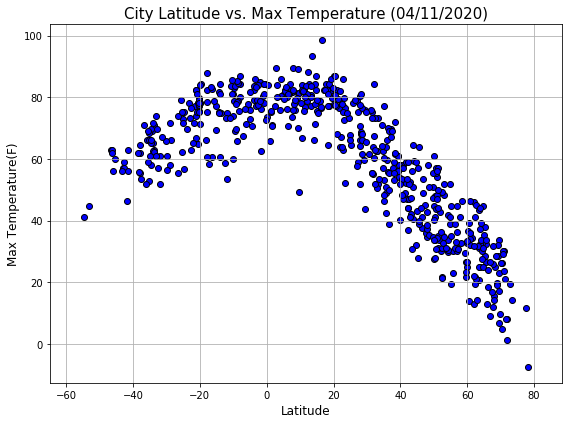

In [15]:
# Get current date
current_d=datetime.now().strftime("%m/%d/%Y")

x_axis=weather_df["Lat"]
y_axis=weather_df["Max Tem"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Max Temperature(F)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Max Temperature ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Max Tem"])-5,max(weather_df["Max Tem"])+5)
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Max Temperature.png')
plt.show()

#### The Conclusion:
This plot depicts the dependence between the maximum temperature and latitude for all retrieved cities. We can see temperatures decrease as we move away from the equator to the North. The pick of the max temperature is in the middle of the plot , between equator and 20 degrees.

### Latitude vs. Humidity Plot

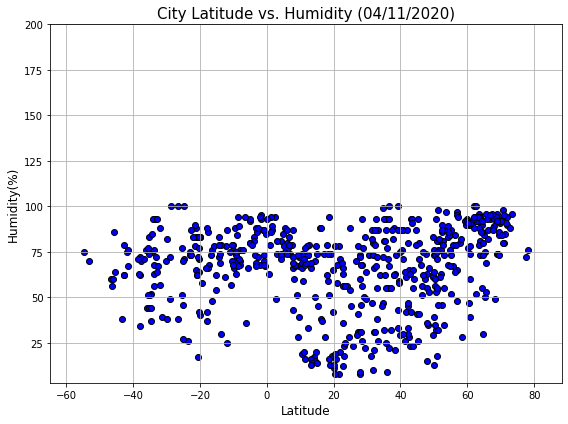

In [16]:
x_axis=weather_df["Lat"]
y_axis=weather_df["Humidity"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Humidity(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Humidity ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Humidity"])-5,max(weather_df["Humidity"])+100)
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Humidity.png')
plt.show()

#### The Conclusion: 
This plot depicts the dependence between the humidity and latitude for all retrieved cities. Humidity is distributed fairly evenly through the graph. The highest humidity we can observe 60-70 degrees north .

### Latitude vs. Cloudiness Plot

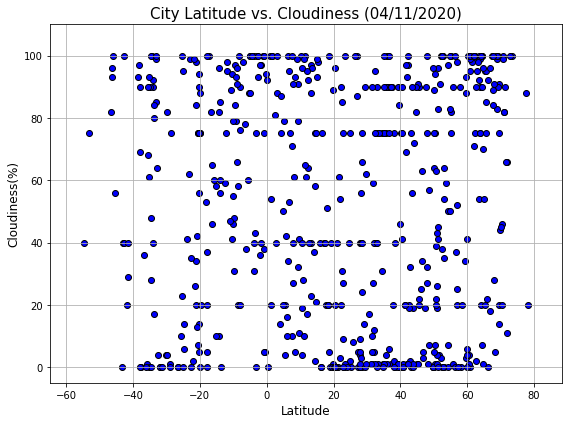

In [17]:
x_axis=weather_df["Lat"]
y_axis=weather_df["Cloudiness"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Cloudiness(%)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Cloudiness ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Cloudiness"]-5),max(weather_df["Cloudiness"]+10))
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Cloudiness.png')
plt.show()

#### The Conclusion: 

The graph shows relationships between cloudiness and city latitude.Cloudiness is evenly distributed.

### Latitude vs. Wind Speed Plot

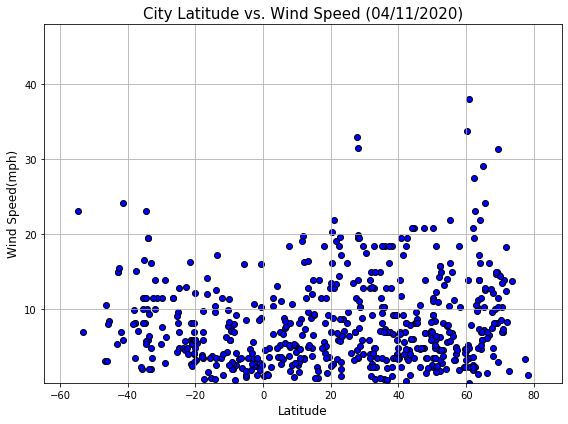

In [22]:
x_axis=weather_df["Lat"]
y_axis=weather_df["Wind Speed"]
plt.figure(figsize=(8,6))
plt.scatter(x_axis,y_axis,marker="o", color="blue",edgecolor="black")
plt.ylabel('Wind Speed(mph)',fontSize=12)
plt.xlabel('Latitude',fontSize=12)
plt.title(f"City Latitude vs. Wind Speed ({current_d})",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(weather_df["Lat"])-10,max(weather_df["Lat"])+10)
plt.ylim(min(weather_df["Wind Speed"]),max(weather_df["Wind Speed"]+10))
plt.grid()
plt.tight_layout()
plt.savefig('plot_images/City Latitude vs. Wind Speed.png')
plt.show()

#### The Conclusion: 

The graph shows relationships between wind speed and city latitude. The most common wind speed is to 10mph. There are some wind pics in cities with more then 30mph.


## Linear Regression

In [23]:
# Create a function to create Linear Regression plots
def line_reg(x_axis,y_axis,name_ylabel,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,6))
    plt.scatter(x_axis,y_axis, marker="o", color="blue",edgecolor="black")
    plt.ylabel(name_ylabel,fontSize=11)
    plt.xlabel('Latitude',fontSize=11)
    plt.title(title,fontSize=12)
    plt.xticks(fontSize=10)
    plt.yticks(fontSize=10)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(min(x_axis),min(y_axis)),fontsize=15,color="red")
    plt.grid()
    file_name=title[:title.find(f'({current_d})')]
    plt.savefig(f'plot_images/{file_name}.png')
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames
s_hem=weather_df[weather_df["Lat"]<0]
n_hem=weather_df[weather_df["Lat"]>=0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9092220840623736


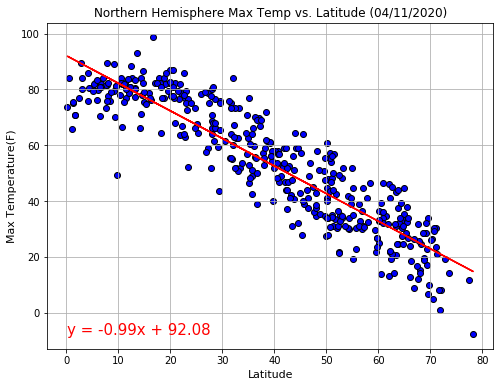

In [25]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Northern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7090922700435152


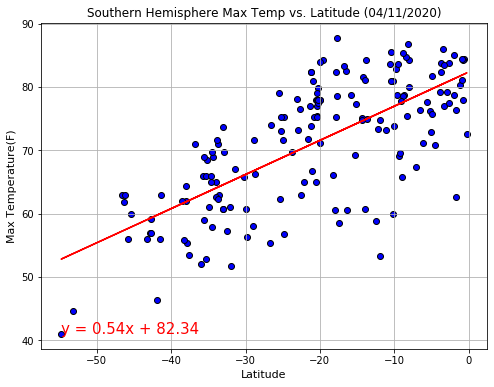

In [26]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Max Tem"]
name_ylabel="Max Temperature(F)"
title=f"Southern Hemisphere Max Temp vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: 
There are different types of correlations between the two plots. In the Northern Hemisphere, we observe a negative correlation, the farther we are from the equator the lower the temperature. The r-value indicates an almost perfect dependency between max temperature and latitude. In the Southern Hemisphere, the situation is completely opposite. There is a positive correlation between maximum temperature and geographic location: the farther from the equator the higher the temperature.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31981389994168413


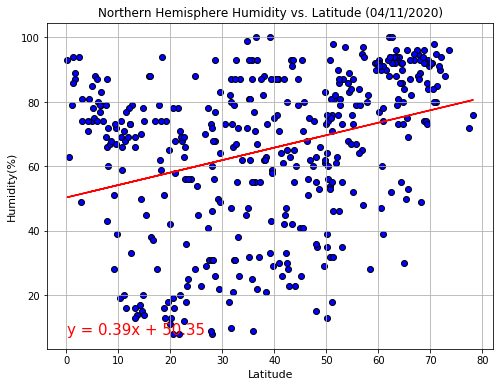

In [27]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Northern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24270211400337866


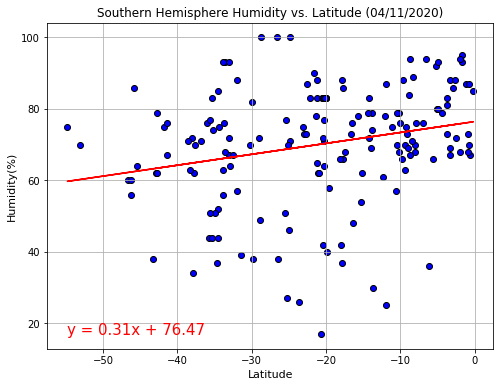

In [28]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Humidity"]
name_ylabel="Humidity(%)"
title=f"Southern Hemisphere Humidity vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: 
The linear regression between the Northern and Southern hemispheres is approximately the same. Due to the fact that Northern Hemispheres contains more cities to analyze, so R2 is higher. Also based on r2 value we can say that there is no perfect dependency between humidity and latitude.



 ### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13042981210126706


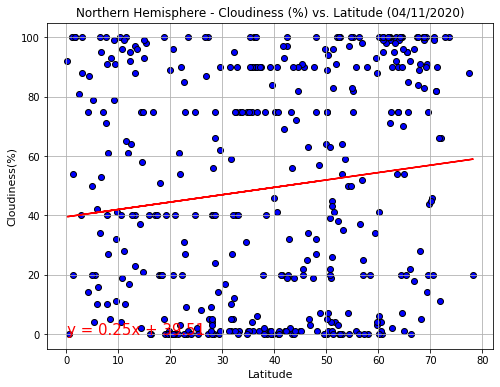

In [29]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16209212145835195


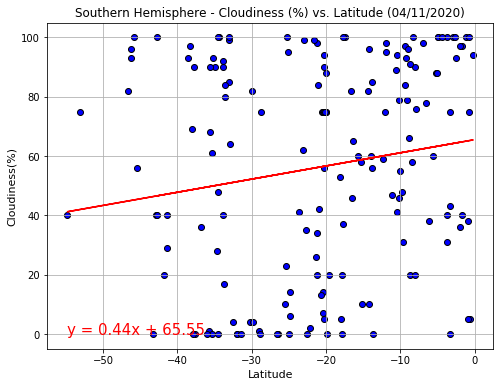

In [30]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Cloudiness"]
name_ylabel="Cloudiness(%)"
title=f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: 
The linear regression between the Northern and Southern hemispheres is approximately the same. Also based on r2 value, we can say that there is no perfect dependency between cloudiness and latitude. So we cannot predict cloudiness based on cities' geographic location. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12252042249176241


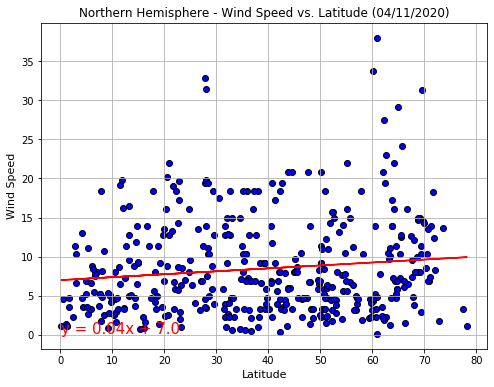

In [31]:
x_axis=n_hem["Lat"]
y_axis=n_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Northern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3936204218319531


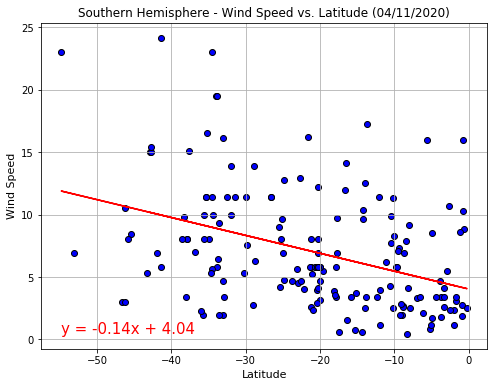

In [32]:
x_axis=s_hem["Lat"]
y_axis=s_hem["Wind Speed"]
name_ylabel="Wind Speed"
title=f"Southern Hemisphere - Wind Speed vs. Latitude ({current_d})"
line_reg(x_axis,y_axis,name_ylabel,title)

#### The Conclusion: 

Although there are more cities to analyze in the Northern Hemisphere, we do not observe a strong relationship between wind speed and latitude. In the Southern Hemisphere, we have a mild negative correlation. The farther we are from the equator, the lower the wind speed.